In [1]:
%%capture
!pip install ripser
!pip install persim

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [30]:
def ShowBarcode(PersHom, degrees, colorScheme=['b','g','r','c','m','k','y']) :
    
    number=0
    for i in degrees:
        number+=len(PersHom[i])
    
    fig = plt.figure()
    height=1
    if number<40 : 
        height=number/40
    ax = fig.add_axes([0,0,0.6,height])
    
    low=0
    for i in degrees:
        upp=low+len(PersHom[i])
        X=np.arange(low, upp)
        low=upp
        births=[]
        lives=[]
        for h in PersHom[i]:
            births.append(h[0])
            lives.append(h[1]-h[0])
        ax.barh(X, lives, color = colorScheme[i], height = 0.75, left = births, label="Homology of deg "+str(i))
    ax.barh(0, 0, height = 1)
    ax.barh(number-1, 0, height = 1)
    legend = height+0.06*len(degrees)
    if legend>1:
        fig.legend(loc='upper left')
    else :
        fig.legend(loc='upper left', bbox_to_anchor=(0, 0, 0.6, legend))

In [113]:
u=np.array([8,0])
v=np.array([2,8])

A=np.transpose(np.array([u,v]))
Ainv=np.linalg.inv(A)

def metric(P,Q):
    ans=max((abs(P[0]-Q[0]), abs(P[1]-Q[1])))
    return ans

def dist(x,y,search_width=5):
    distances=[]
    for t0 in range(-search_width,search_width):
        for t1 in range(-search_width,search_width):
            distances.append(metric(np.array(x),np.array(y)+t0*u+t1*v))
    return min(distances)

def CheckIfFundamental(P):
    P1=Ainv.dot(P)
    if P1[0]>=0 and P1[0]<1 and P1[1]>=0 and P1[1]<1 :
        return True
    else: 
        return False

#print(dist([0, 0],[3,1]))
#CheckIfFundamental([5,2])

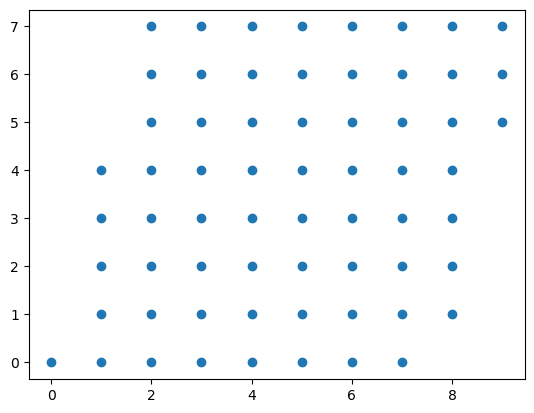

In [114]:
k=50
density=1
points=[]
for i in range(-k,k):
    for j in range(-k,k):
        point=np.array([i/density,j/density])
        if(CheckIfFundamental(point)):
            points.append(point)
points=np.array(points)
plt.scatter(points[:,0],points[:,1])

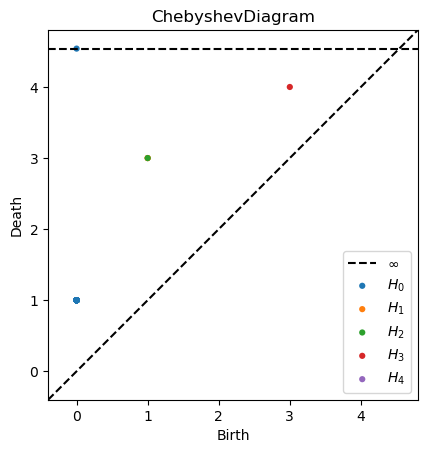

In [117]:
DistMatr=[]
for P in points:
    row=[]
    for Q in points:
        row.append(dist(P,Q))
    DistMatr.append(row)
    
data=np.array(DistMatr)

dgms = ripser(data, distance_matrix=True, maxdim=4, thresh=np.inf)['dgms']  
plot_diagrams(dgms, title='ChebyshevDiagram', size = 20)

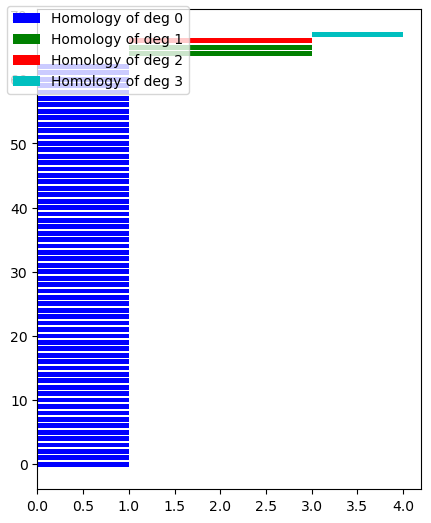

In [118]:
#This checks that there exists lots of connected components
#until time reaches 1. When time belongs to [1,2), we have homology of a torus:
#two cycles in degree 1, and 1 cycle in degree 2. 
#I don't quite understand a 3rd homology which lives in time interval [2,3)
ShowBarcode(dgms, degrees=[0,1,2,3])

In [84]:
print(dgms)

[array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0., inf]]), array([[1., 2.],
       [1., 2.]]), array([[2., 3.],
       [1., 2.]]), array([], shape=(0, 2), dtype=float64)]


In [ ]:
m=4000
Allpoints=np.random.uniform(-10,10, (m, 2))
points=[]
for point in Allpoints :
    if(CheckIfFundamental(point)):
        points.append(point)
points=np.array(points)
plt.scatter(points[:,0],points[:,1])
